# Car sales data in Canada

*March 30, 2022*

Let's explore some data for a story coming up on the decline of the gasoline car. We'll use this data [here](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010000803) and [here](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002401), on the number of units and value of units sold. We use pandas for the analysis.

In [2]:
import pandas as pd

## Vehicle manufacturing

Read in the data and show a little sample of it.

In [3]:
raw = pd.read_csv('../raw/RAW 2022 CAR SALES.csv', encoding="utf-8")

raw.sample()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
234,2017-06,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Dollars,Unadjusted,Dollars,81,thousands,3,v42169913,1.1.1.2.1,8299645,NaN,NaN,NaN,0


Now we pivot to show two columns of values: units sold and dollar value of sales.

In [4]:
data = raw.pivot(index="REF_DATE", columns="UOM", values='VALUE')

Because the data is not seasonally adjusted, if we were to just chart this, it looks a bit wonky. The trend we want to show is obscured.

(StatsCan has discontinued seasonally adjusted unit sales, apparently!)

<AxesSubplot:xlabel='REF_DATE'>

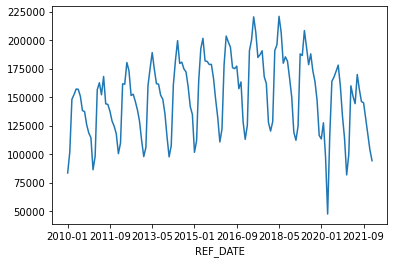

In [5]:
data.loc[:, "Units"].plot()

Instead, we can proceed in two ways: show from January to January, or group and sum by year. Let's try the latter. First, our index should be converted to datetime.

In [6]:
data.index = pd.to_datetime(data.index)

Now we group by year and sum, then plot.

<AxesSubplot:xlabel='REF_DATE'>

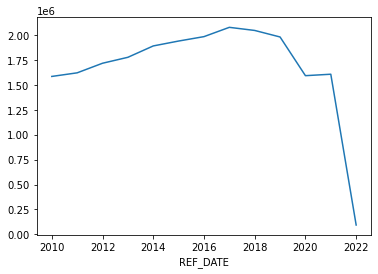

In [7]:
(data
 .groupby(data.index.year).sum()
 .loc[:, "Units"]
 .plot()
 )

For fun, let's also look at January to January.

<AxesSubplot:xlabel='REF_DATE'>

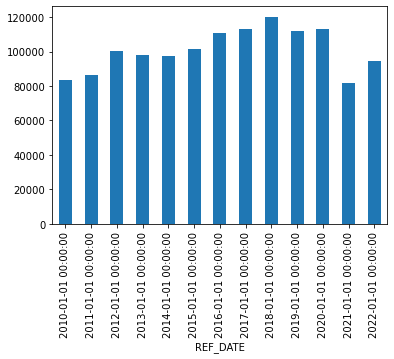

In [8]:
(data
 .loc[data.index.month == 1, "Units"]
 .plot(kind="bar")
 )

Which do you like better? I'm inclined to go with the line chart year over year to illustrate the trend (that drop off is steep!), but either approach could work. From here, I put the data in Datawrapper for a public-facing chart.

## Vehicle registrations by fuel type

Let's also take a peek at another data set, this one on vehicle registrations (and broken down by fuel type!). This might be a better way to see what I'm really interested in: the decline of gas powered vehicles.

In [33]:
registrations = pd.read_csv('../raw/RAW 2022 EVEHICLES.csv')

registrations.head()

,REF_DATE,GEO,DGUID,Fuel type,Vehicle type,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,425043,NaN,NaN,NaN,0
1,2017-04,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,611018,NaN,NaN,NaN,0
2,2017-07,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,552329,NaN,NaN,NaN,0
3,2017-10,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,450846,NaN,NaN,NaN,0
4,2018-01,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,406120,NaN,NaN,NaN,0


We'll pivot the data so it's in a more useful shape for us.

In [16]:
pivot = registrations.pivot(columns="Fuel type", index="REF_DATE", values="VALUE")

pivot.head()

Fuel type,All fuel types,Battery electric,Diesel,Gasoline,Hybrid electric,Other fuel types,Plug-in hybrid electric
REF_DATE,,,,,,,
2017-01,425043,1664,14283,403087,4185,0,1824
2017-04,611018,2195,17643,581151,7199,0,2830
2017-07,552329,2400,18150,521730,7264,1,2784
2017-10,450846,2820,15711,423659,5473,4,3179
2018-01,406120,2639,14642,380187,4377,70,4205


Then let's add a new column showing the combined number of battery powered and hybrid vehicles together.

In [32]:
pivot["Electric"] = pivot.loc[:, ["Battery electric", "Hybrid electric"]].sum(axis=1)

Then, we'll group by year because once again, this data is not seasonally adjusted.

In [34]:
pivot.index = pd.to_datetime(pivot.index)

pivot[["Gasoline", "Electric"]].groupby(pivot.index.year).sum()

Fuel type,Gasoline,Electric
REF_DATE,,
2017,1929627,33200
2018,1834883,48407
2019,1776571,73913
2020,1384928,80489
2021,1126925,108980


I put this into a very simple (but I think, effective) [line chart](https://www.datawrapper.de/_/9ZOm6/) to show the declining gasoline registrations and increasing electric registrations.

\-30\-